In [1]:
%load_ext autoreload
%autoreload 2

from src.crf import (
    MLPClassifier,
    MLPCRFClassifier,
    mlp_loss,
    mlpcrf_loss,
    plot_predict_crf,
    train_crf,
)
from src.data import batch_dataset, load_data, split_data, time_series_split

In [2]:
df = load_data()
dataset = split_data(
    df,
    without_cols=[
        "Timestamp",
        "Light1",
        "Light2",
        "Light3",
        "Light4",
    ],
    scale="normalize",
)
seq_dataset = batch_dataset(dataset, sequence_length=25)

(x_train, y_train), (x_test, y_test) = dataset
(seq_x_train, seq_y_train), (seq_x_test, seq_y_test) = seq_dataset

  0%|          | 0/100 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       681
           2       0.00      0.00      0.00        93
           3       0.50      0.59      0.54       201

    accuracy                           0.79       975
   macro avg       0.46      0.52      0.49       975
weighted avg       0.72      0.79      0.76       975



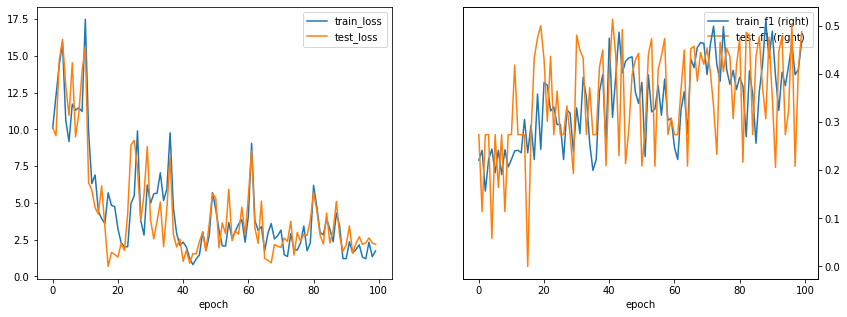

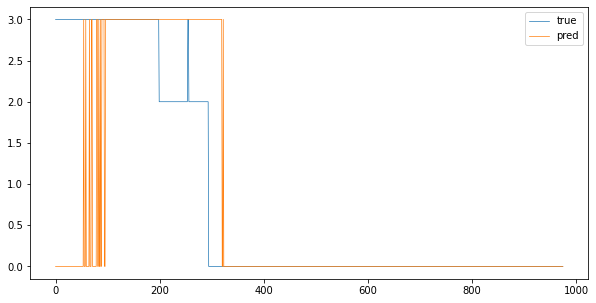

In [3]:
mlp_model = MLPClassifier([64], 4, 12)
_, mlp_log = train_crf(
    model=mlp_model,
    loss_fn=mlp_loss,
    dataset=seq_dataset,
    n_epochs=100,
    lr=0.0005,
    batch_size=16,
    use_mask=False,
)
plot_predict_crf(mlp_model, seq_x_test, seq_y_test)

  0%|          | 0/200 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.44      0.16      0.23      1821
           1       0.00      0.00      0.00       128
           2       0.36      0.45      0.40       121
           3       1.00      0.08      0.15       230

    accuracy                           0.16      2300
   macro avg       0.45      0.17      0.19      2300
weighted avg       0.47      0.16      0.22      2300



  0%|          | 0/200 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.78      0.54      0.64       153
           1       0.59      0.80      0.68       116
           2       0.86      0.90      0.88       156

    accuracy                           0.74       425
   macro avg       0.75      0.75      0.73       425
weighted avg       0.76      0.74      0.74       425



  0%|          | 0/200 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4290
           1       0.00      0.00      0.00       138
           2       0.00      0.00      0.00       242
           3       0.33      1.00      0.50       130

    accuracy                           0.92      4800
   macro avg       0.33      0.50      0.37      4800
weighted avg       0.87      0.92      0.89      4800



  0%|          | 0/200 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       781
           1       0.00      0.00      0.00         0
           2       0.32      0.62      0.42        93
           3       0.51      0.18      0.27       201

    accuracy                           0.80      1075
   macro avg       0.44      0.45      0.41      1075
weighted avg       0.81      0.80      0.79      1075



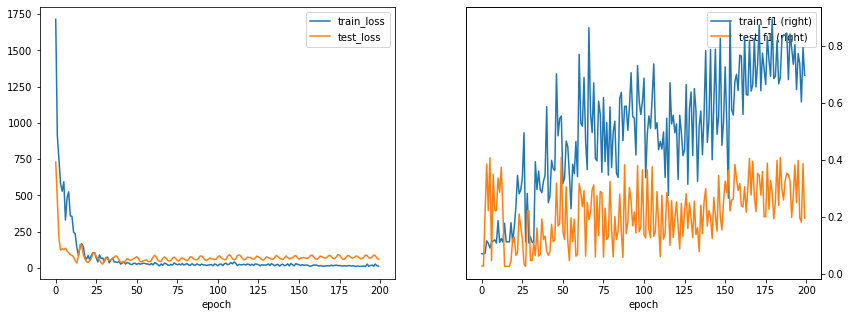

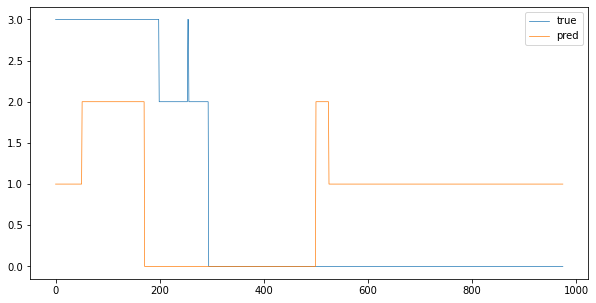

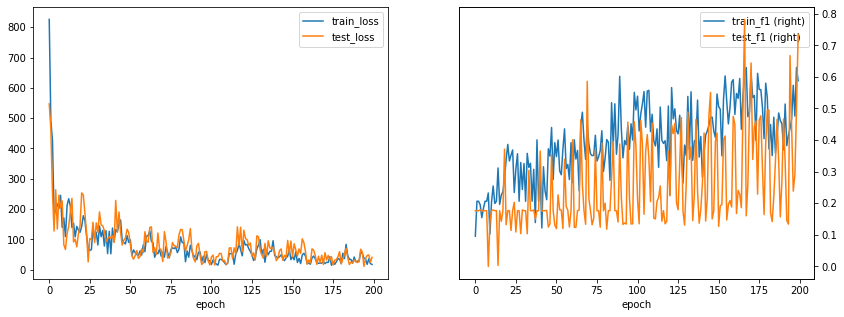

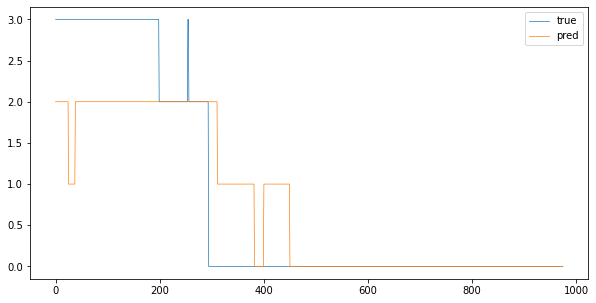

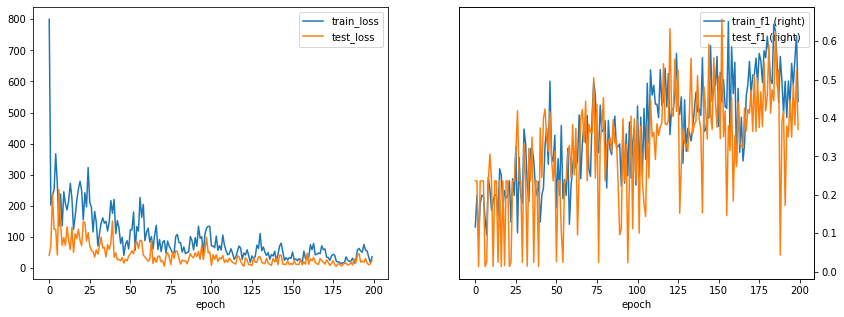

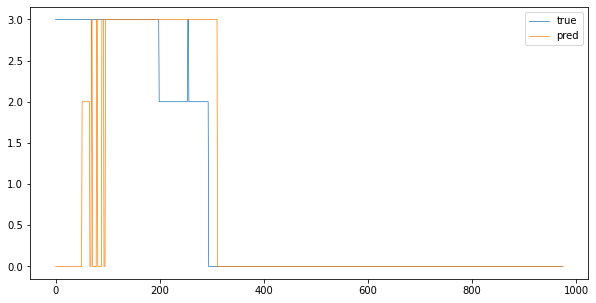

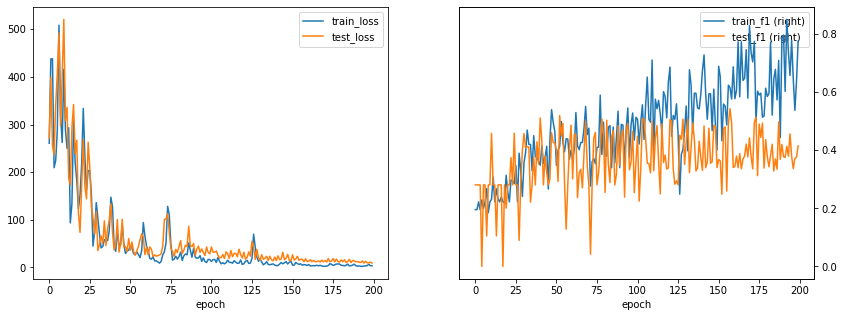

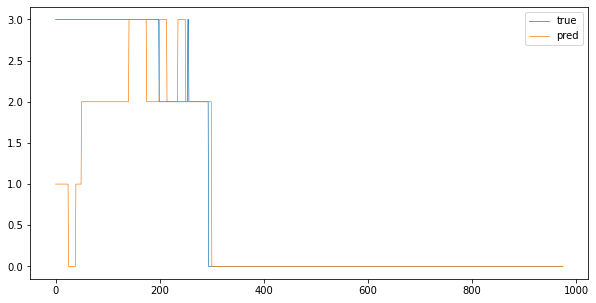

In [5]:
series = time_series_split(df)

for s in series:
    s_dataset = batch_dataset(s, sequence_length=25)
    _, (x_te, y_te) = s_dataset

    mlpcrf_model = MLPCRFClassifier([64], 4, 12)
    _, mlpcrf_log = train_crf(
        model=mlpcrf_model,
        loss_fn=mlpcrf_loss,
        dataset=s_dataset,
        n_epochs=200,
        lr=0.001,
        batch_size=16,
        use_mask=False,
    )
    plot_predict_crf(mlpcrf_model, x_te, y_te)